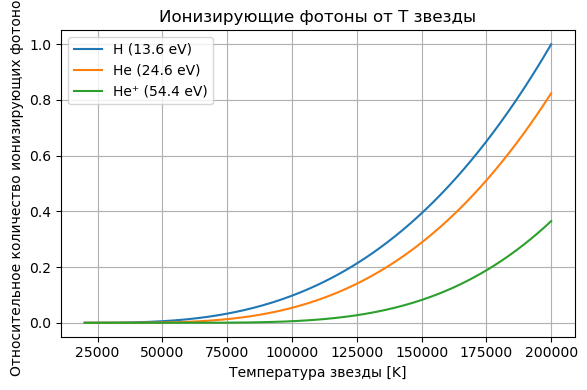

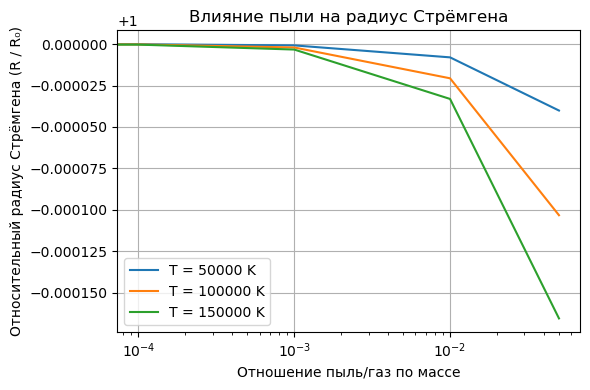

In [26]:
# Задание 1
import numpy as np
import matplotlib.pyplot as plt

# Константы
h = 6.62607015e-34  # Дж*с
k_B = 1.380649e-23  # Дж/К
c = 2.99792458e8    # м/с
eV = 1.60218e-19    

# Энергии ионизации (эВ)
E_H = 13.6
E_He = 24.6
E_He_plus = 54.4

# Частоты (Гц)
nu_H = E_H * eV / h
nu_He = E_He * eV / h
nu_He_plus = E_He_plus * eV / h

# Т звезды (К)
T_star = np.linspace(20000, 200000, 200)

# Функция для расчёта ионизирующих фотонов
def ionizing_photons(T, nu_thresh):
    x_thresh = h * nu_thresh / (k_B * T)
    x = np.linspace(x_thresh, 100, 1000)
    integrand = x**2 / (np.exp(x) - 1)
    return np.trapz(integrand, x) * (2 * np.pi * (k_B * T)**3) / (h**3 * c**2)

# Потоки ионизирующих фотонов
Q_H = np.array([ionizing_photons(T, nu_H) for T in T_star])
Q_He = np.array([ionizing_photons(T, nu_He) for T in T_star])
Q_He_plus = np.array([ionizing_photons(T, nu_He_plus) for T in T_star])

# Относительные значения
Q_H_rel = Q_H / Q_H.max()
Q_He_rel = Q_He / Q_H.max()
Q_He_plus_rel = Q_He_plus / Q_H.max()

# === График 1: Потоки ионизирующих фотонов ===
plt.figure(figsize=(6, 4))
plt.plot(T_star, Q_H_rel, label='H (13.6 eV)')
plt.plot(T_star, Q_He_rel, label='He (24.6 eV)')
plt.plot(T_star, Q_He_plus_rel, label='He⁺ (54.4 eV)')
plt.xlabel("Температура звезды [K]")
plt.ylabel("Относительное количество ионизирующих фотонов")
plt.title("Ионизирующие фотоны от Т звезды")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Модель области HII с учётом пыли ===

# Параметры среды
alpha_B = 2.6e-13  # Коэффициент рекомбинации (см^3/с)
n_H = 100  # Плотность водорода (см^-3)
Q_0 = Q_H * 1e49 / Q_H.max()  # Нормировка по Q = 1e49

# Радиус Стрёмгена без пыли (см)
R_s = (3 * Q_0 / (4 * np.pi * alpha_B * n_H**2))**(1/3)

# Параметры пыли
rho_grain = 3000  # кг/м^3
r_dust = 0.3e-6  # м
sigma_dust_geom = np.pi * r_dust**2  # м^2
sigma_dust_geom_cm2 = sigma_dust_geom * 1e4  # см^2

dust_to_gas_mass = np.array([0, 1e-4, 1e-3, 1e-2, 5e-2])  # Отношение пыль/газ
mu_H = 1.67e-24  # г (масса атома H)
m_grain = (4/3) * np.pi * (r_dust * 100)**3 * rho_grain  # г

# Массивы для результатов
R_s_dusty = []
tau_gas_list = []
tau_dust_list = []

# Расчёты
for D2G in dust_to_gas_mass:
    n_dust = D2G * n_H * mu_H / m_grain  # [n/см^3]
    kappa_dust = n_dust * sigma_dust_geom_cm2  # [1/см]
    R_eff = R_s / (1 + (kappa_dust * R_s / 3))  # Радиус с учетом пыли
    tau_dust = kappa_dust * R_eff
    tau_gas = n_H * sigma_dust_geom_cm2 * R_eff 

    R_s_dusty.append(R_eff)
    tau_dust_list.append(tau_dust)
    tau_gas_list.append(tau_gas)

R_s_dusty = np.array(R_s_dusty)
tau_dust_list = np.array(tau_dust_list)
tau_gas_list = np.array(tau_gas_list)

# === График 2: Влияние пыли на радиус Стрёмгена ===
plt.figure(figsize=(6, 4))
for i, T in enumerate([50000, 100000, 150000]):
    idx = np.argmin(np.abs(T_star - T))
    plt.plot(dust_to_gas_mass, R_s_dusty[:, idx] / R_s[idx], label=f"T = {T} K")

plt.xlabel("Отношение пыль/газ по массе")
plt.ylabel("Относительный радиус Стрёмгена (R / R₀)")
plt.xscale("log")
plt.title("Влияние пыли на радиус Стрёмгена")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

График 1 показывает, как изменяются темпы ионизации для атома водорода, гелия и ионизованного гелия (He+) в зависимости от температуры звезды от 20к до 200к К.
Основные наблюдения:
H (13.6 эВ) начинает эффективно ионизироваться уже при температуре около 30к К.
He (24.6 эВ) требует больше температуры, поток ионизирующих фотонов становится заметным ближе к 50-60к К.
Ионизация He+ (54.4 эВ) происходит только при высоких температурах (>100к К).
Это напрямую влияет на положение радиусов Стрёмгена:
Радиус для HII будет наибольшим, радиус для HeII будет меньше, радиус для HeIII - самый внутренний, при T > 10^5 К

На графике 2 показано, как радиус Стрёмгена уменьшается по мере увеличения отношения пыли к газу.
R/R0 - это отношение запылённого радиуса к радиусу без пыли. При нулевой пыли все радиусы равны исходному R0.
При отношении 0.01 (характерном для МЗС) отношение заметно уменьшается, особенно для горячих звёзд (тк излучают больше фотонов, способных быть поглощёнными пылью).
Пыль поглощает ионизирующие фотоны, уменьшая количество энергии, доступной для ионизации газа. Радиус уменьшается, потому что баланс ионизации достигается быстрее при меньшем объёме.

In [7]:
#Задание 2
import numpy as np
import matplotlib.pyplot as plt

# Константы
h = 6.62607015e-34       
k_B = 1.380649e-23       
c = 2.99792458e8         
eV = 1.60218e-19         

# Энергия ионизации водорода
E_H = 13.6               
nu_H = E_H * eV / h      

# --- Параметры звезды и среды ---
T_star_orion = 40000     # K
L_star_orion = 1e6       # в L sun
L_sun = 3.828e26         # Вт
L_star = L_star_orion * L_sun  # Вт

n_H = 100                # плотность газа
alpha_B = 2.6e-13        # коэф. рекомбинации

# --- Параметры пыли ---
rho_grain = 3000         # плотность
r_dust = 0.3e-6          # радиус пылинки
dust_to_gas_mass = 0.01  # отношение масс
mu_H = 1.67e-27          # масса атома водорода, кг
m_grain = (4/3) * np.pi * r_dust**3 * rho_grain  # масса пылинки
sigma_dust_geom = np.pi * r_dust**2              # геометр. сечение м2
sigma_dust_geom_cm2 = sigma_dust_geom * 1e4      # см2

def ionizing_photons(T, nu_thresh):
    x_thresh = h * nu_thresh / (k_B * T)
    x = np.linspace(x_thresh, 100, 1000)
    integrand = x**2 / (np.exp(x) - 1)
    integral = np.trapz(integrand, x)
    return integral * (2 * np.pi * (k_B * T)**3) / (h**3 * c**2)

Q_ion = ionizing_photons(T_star_orion, nu_H)   # фотон/м2/с/ср
Q_ion_total = Q_ion * 4 * np.pi           

# --- Оценка общего числа фотонов ---
fraction_ionizing = 0.6
E_avg_photon = 20 * eV 
Q_star = (L_star * fraction_ionizing) / E_avg_photon  # фотон/с

# --- Радиус Стрёмгена без пыли ---
R_s_cm = (3 * Q_star / (4 * np.pi * alpha_B * n_H**2))**(1/3)  # [см]

# --- Параметры пыли ---
n_dust = dust_to_gas_mass * n_H * mu_H / m_grain  # [n/см3]
kappa_dust = n_dust * sigma_dust_geom_cm2         # [1/см]

# --- Оптическая толщина и доля поглощённых фотонов ---
tau_dust = kappa_dust * R_s_cm
f_dust_absorbed = 1 - np.exp(-tau_dust)
is_dust_dominated = tau_dust > 1

print("=== Orion Nebula ===")
print(f"Tau_dust ≈ {tau_dust:.3f}")
print(f"Fraction absorbed by dust ≈ {f_dust_absorbed:.2%}")
print(f"Dust dominated? {'Yes' if is_dust_dominated else 'No'}")


=== Orion Nebula ===
Tau_dust ≈ 0.261
Fraction absorbed by dust ≈ 22.96%
Dust dominated? No


**Орион**: при температуре звезды 40 000 K и светимости 10^6 L_sun оптическая толщина по пыли составляет ~0.26 - это означает, что около 23% ионизирующих фотонов поглощается пылью.

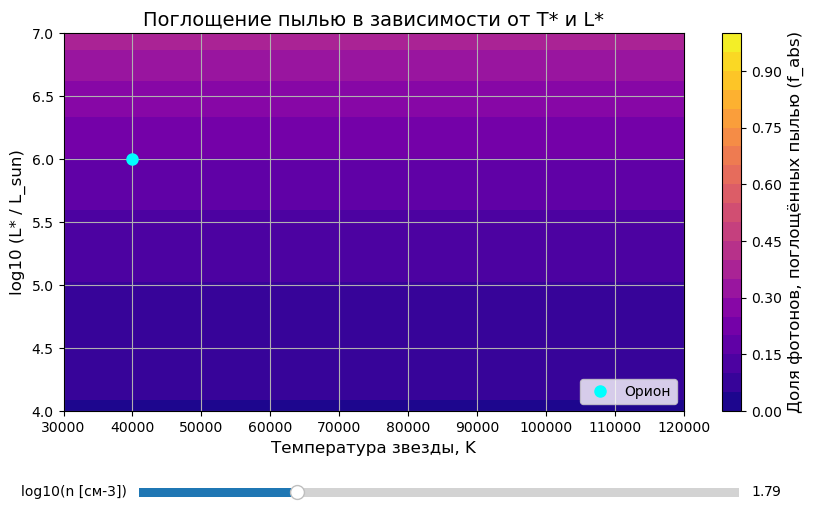

In [24]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

logL = np.log10(L_vals)
T = T_vals

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

n_index = 5
f_plot = f_absorbed_grid[:, :, n_index].T
dust_dom_boundary = (tau_dust_grid[:, :, n_index].T >= 1).astype(float)

contour = ax.contourf(T, logL, f_plot, levels=np.linspace(0, 1, 21), cmap='plasma')
dust_line = ax.contour(T, logL, dust_dom_boundary, levels=[0.5], colors='white', linewidths=2, linestyles='--')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Доля фотонов, поглощённых пылью (f_abs)', fontsize=12)

# Добавляем Орион
orion_T = 40000
orion_L_log = np.log10(1e6)
orion_point = ax.plot(orion_T, orion_L_log, 'o', color='cyan', markersize=8, label='Орион')

# Подписи
ax.set_xlabel("Температура звезды, K", fontsize=12)
ax.set_ylabel("log10 (L* / L_sun)", fontsize=12)
ax.set_title("Поглощение пылью в зависимости от T* и L*", fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

# Слайдер по плотности газа
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, 'log10(n [см-3])', 1, 4, valinit=np.log10(n_vals[n_index]))

def update(val):
    global contour, dust_line
    logn = slider.val
    idx = np.argmin(np.abs(np.log10(n_vals) - logn))
    f_plot = f_absorbed_grid[:, :, idx].T
    tau_cut = (tau_dust_grid[:, :, idx].T >= 1).astype(float)
    
    for coll in contour.collections:
        coll.remove()
    for coll in dust_line.collections:
        coll.remove()

    new_contour = ax.contourf(T, logL, f_plot, levels=np.linspace(0, 1, 21), cmap='plasma')
    new_dust = ax.contour(T, logL, tau_cut, levels=[0.5], colors='white', linewidths=2, linestyles='--')
    
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

Че-то не получилось по крутому со слайдером плотности сделать, jupyter сошел с ума

**Суть:**
При увеличении плотности растет количество пыли, которая сильнее поглощает излучение звёзд. Это приводит к расширению областей с высоким поглощением и смещению границы к меньшей температуре и светимости - при высокой плотности даже неяркие звёзды испытывают сильное поглощение пылью, что влияет на их наблюдаемое излучение.